In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
# Get constants
with open("params_train.json", 'r') as file:
    params = json.load(file)

agent_name      = params['training']['AGENT_NAME']
model_name      = params['training']['MODEL_NAME']
training_rounds = params['training']['TRAINING_ROUNDS']
scenario        = params['training']['SCENARIO']
old_model       = params['training']['START_TRAINING_WITH']

alpha  = params['Q-update']['ALPHA']
gamma  = params['Q-update']['GAMMA']
mode   = params['Q-update']['MODE']
n_step = params['Q-update']['N']


# Print training trivia
train_str = f"Trained 'agent_{agent_name}_{model_name}' in '{scenario}' for {training_rounds} rounds "
if old_model == "RESET":
    train_str += f"from scratch."
else:
    train_str += f"starting with '{old_model}'."
print(train_str)
print(f"Performed Q-update in {n_step}-step {mode} mode.  (alpha = {alpha}, gamma = {gamma})")

Trained 'agent_h4_coin-miner30k' in 'loot-box' for 30000 rounds from scratch.
Performed Q-update in 5-step SARSA mode.  (alpha = 0.1, gamma = 1)


In [3]:
# All possible features
all_direction_features = np.array(
    [
        [0, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 0, 1, 1],
        [0, 1, 1, 1],
        [1, 1, 1, 1],
        [0, 0, 0, 2],
        [0, 0, 1, 2],
        [0, 1, 1, 2],
        [1, 1, 1, 2],
        [0, 0, 2, 2],
        [0, 1, 2, 2],
        [1, 1, 2, 2],
        [0, 2, 2, 2],
        [1, 2, 2, 2],
        [2, 2, 2, 2],   
    ]
)
all_own_spot_features  = np.array([0, 1, 2])
all_mode_features      = np.array([0, 1, 2])  

### Evaluating the trained model

In [4]:
trained_model = np.load(f"model_{agent_name}_{model_name}.npy")
Sa_counter    = np.load(f"sa_counter_{agent_name}_{model_name}.npy")
policy        = np.argmax(trained_model, axis = -1)

In [5]:
def look_up_q_tensor(f5 = 1):
    print(f"Q-Tensor for case (f5 = {f5}):")
    print(f"state  direction features   policy  trained model  {'':20}number of encounters")
    for i in range(len(all_direction_features)):
        line = f"{i:2}{'':2}{all_direction_features[i]} {[f5]}{'':2}{policy[i, f5]}{'':2}["
        for Q_value in trained_model[i, f5]:
            line += f"{Q_value:-7.1f}"
        line += f"]  {np.sum(Sa_counter[i, f5]):5} ["
        for count in Sa_counter[i, f5]:
            line += f" {count:5}"
        line += f"]"
        print(line)

In [6]:
look_up_q_tensor(f5 = 0)

Q-Tensor for case (f5 = 0):
state  direction features   policy  trained model                      number of encounters
 0  [0 0 0 0] [0]  4  [ -104.1 -104.1 -104.1 -104.1 -104.0 -104.1]  33636 [  2516  2544  2587  2586 21450  1953]
 1  [0 0 0 1] [0]  3  [ -104.1 -103.8 -103.4   82.3 -103.0 -103.6]  25729 [   575   637   583 22800   590   544]
 2  [0 0 1 1] [0]  3  [  -92.3  -90.2  -18.9  100.0  -88.5  -88.3]   3818 [   141   121   530  2814   123    89]
 3  [0 1 1 1] [0]  2  [  -47.3  -46.6   27.9  -47.2  -49.5  -50.5]    105 [     8    13    51    10    13    10]
 4  [1 1 1 1] [0]  0  [    0.0    0.0    0.0    0.0    0.0    0.0]      0 [     0     0     0     0     0     0]
 5  [0 0 0 2] [0]  3  [ -104.8 -104.8 -104.9   78.5 -103.9 -104.9]  71987 [  1386  1395  1420 65034  1425  1327]
 6  [0 0 1 2] [0]  3  [  -98.4  -99.9  -40.2   96.2  -99.7 -100.3]   7221 [   138   140   354  6278   155   156]
 7  [0 1 1 2] [0]  1  [  -81.1   62.8  -76.1  -57.5  -75.5  -80.8]    837 [    30   672  

In [7]:
look_up_q_tensor(f5 = 1)

Q-Tensor for case (f5 = 1):
state  direction features   policy  trained model                      number of encounters
 0  [0 0 0 0] [1]  5  [   21.6   23.6   27.4    6.4   23.3   84.2]  24065 [  2803  1496  1868  1043  5670 11185]
 1  [0 0 0 1] [1]  3  [   10.6    8.0   -3.0   85.8   60.4   -0.2]  26466 [   734   613   790 21363  1791  1175]
 2  [0 0 1 1] [1]  4  [  -47.9  -22.6  -16.7  -27.5   96.0    0.7]   5140 [   110   109   355   135  4280   151]
 3  [0 1 1 1] [1]  2  [  -86.2  -11.7   94.7   -8.0    0.9  -26.4]   5194 [    95    69  4823    76    70    61]
 4  [1 1 1 1] [1]  3  [   -2.6   -2.6   -2.6   11.0   -2.6   -2.7]      7 [     1     1     1     2     1     1]
 5  [0 0 0 2] [1]  2  [   84.3   84.3   84.4   84.3   83.4   79.1]  1241543 [ 52494 51863 55822 582912 472366 26086]
 6  [0 0 1 2] [1]  3  [   81.7   82.6   84.3   84.6   84.3   29.8]  1927339 [ 115050 120450 563238 616387 492471 19743]
 7  [0 1 1 2] [1]  3  [   42.3   87.9   81.7   88.2   83.4   83.0]  361152 [  

In [8]:
look_up_q_tensor(f5 = 2)

Q-Tensor for case (f5 = 2):
state  direction features   policy  trained model                      number of encounters
 0  [0 0 0 0] [2]  4  [   13.0    6.7   32.8   10.1   85.8  -11.0]  15732 [   796   798   518  1019 11912   689]
 1  [0 0 0 1] [2]  5  [   54.6   50.8   48.9   38.5   31.9   84.3]  264634 [ 13360 11682 14458 70148 115167 39819]
 2  [0 0 1 1] [2]  1  [   56.9   74.1   59.5   56.1   57.2   71.6]  518002 [ 11202  9059 130185 117175 225074 25307]
 3  [0 1 1 1] [2]  5  [   56.7   65.6   63.8   58.2   60.2   95.5]  190991 [  1546 41579 58276 47652 33075  8863]
 4  [1 1 1 1] [2]  5  [  -45.0  -50.2  -38.5  -42.0  -37.7   96.9]   6980 [   453  1991   245   823  2178  1290]
 5  [0 0 0 2] [2]  3  [  -44.0  -48.9  -45.1   69.1  -44.6  -44.8]   4141 [   865   962   730   937   589    58]
 6  [0 0 1 2] [2]  4  [  -12.4  -14.1  -10.2    9.9   35.0   15.5]   4157 [    63   214   136    27  3698    19]
 7  [0 1 1 2] [2]  3  [   -1.8   -1.0   -4.4   13.2   -0.5   -0.4]     10 [     1 

## Looking at the training process

### Training performance over rounds

In [9]:
def moving_average (x, w):
    """
    from https://newbedev.com/how-to-calculate-rolling-moving-average-using-numpy-scipy
    """
    return np.convolve(x, np.ones(w), 'valid') / w

In [10]:
with open("results_train.json", 'r') as file:
    training_results = json.load(file)

In [11]:
number_of_rounds = training_results['by_agent'][f"agent_{agent_name}"]['rounds']
round_list       = list(training_results['by_round'])
rounds           = np.arange(number_of_rounds) + 1
collected_coins  = np.zeros(number_of_rounds, dtype = int)
round_lengths    = np.zeros(number_of_rounds, dtype = int)
kills            = np.zeros(number_of_rounds, dtype = int)
suicides         = np.zeros(number_of_rounds, dtype = int)
died             = np.zeros(number_of_rounds, dtype = int)
invalid_moves    = np.zeros(number_of_rounds, dtype = int)

for round_name in round_list:
    round_dict             = training_results['by_round'][round_name]
    round                  = round_dict['round'] - 1   # round index
    collected_coins[round] = round_dict['coins'][0]
    round_lengths[round]   = round_dict['steps']
    kills[round]           = round_dict['kills'][0]
    suicides[round]        = round_dict['suicides'][0]
    died[round]            = round_dict['got killed'][0]
    invalid_moves[round]   = round_dict['invalid'][0]


In [12]:
survived        = 1 - died
was_killed      = died - suicides
steps_survived  = np.where(died, round_lengths, 400)

In [13]:
avg_length   = 50   # number of rounds to average over

kill_rate           = moving_average(kills, avg_length)
suicide_rate        = moving_average(suicides, avg_length)
was_killed_rate     = moving_average(was_killed, avg_length)
died_rate           = moving_average(died, avg_length)
steps_survived_rate = moving_average(steps_survived, avg_length)


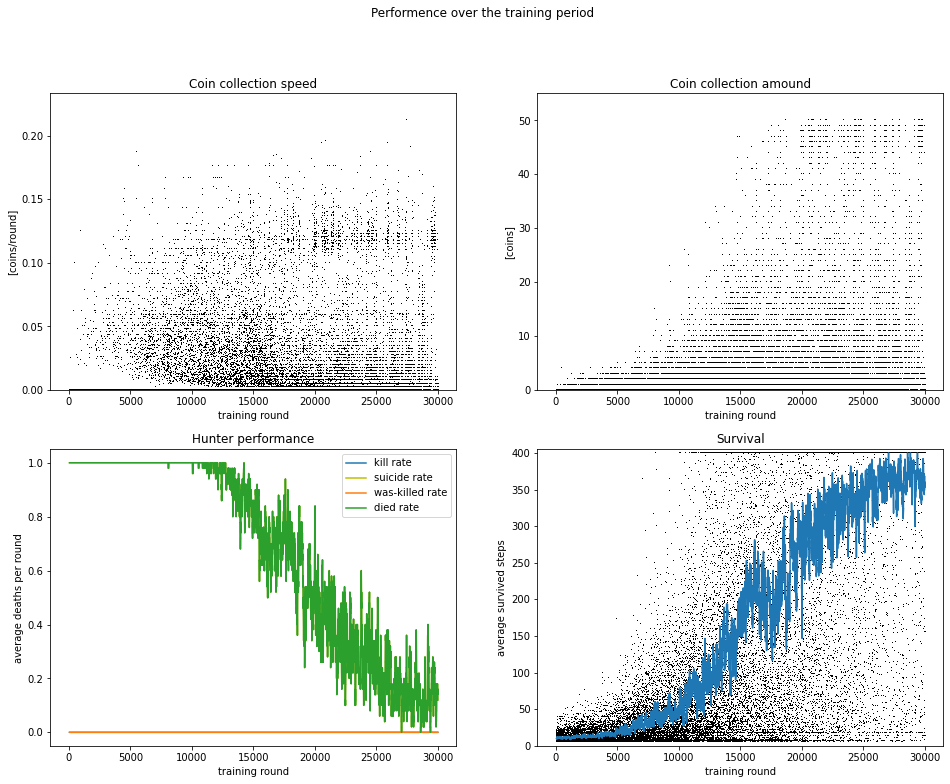

In [14]:
plt.figure(figsize = (16,12))
plt.suptitle("Performence over the training period")

plt.subplot(2, 2, 1)
speed = collected_coins / round_lengths
plt.plot(rounds, speed, ',k')
plt.ylim((0, 1.1*max(speed)))
plt.title("Coin collection speed")
plt.ylabel("[coins/round]")   # speed of 0.4 would be considerad great performance
plt.xlabel("training round")

plt.subplot(2, 2, 2)
plt.plot(rounds, collected_coins, ',k')
plt.ylim((0, 1.1*max(collected_coins)))
plt.title("Coin collection amound")
plt.ylabel("[coins]")   # speed of 0.4 would be considerad great performance
plt.xlabel("training round")

plt.subplot(2, 2, 3)
plt.plot(rounds[avg_length-1:], kill_rate, label = "kill rate")
plt.plot(rounds[avg_length-1:], suicide_rate, 'y', label = "suicide rate")
plt.plot(rounds[avg_length-1:], was_killed_rate, label = "was-killed rate")
plt.plot(rounds[avg_length-1:], died_rate, label = "died rate")
plt.xlim(-0.05*number_of_rounds, 1.05*number_of_rounds)
plt.title("Hunter performance")
plt.ylabel("average deaths per round")   # speed of 0.4 would be considerad great performance
plt.xlabel("training round")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(rounds, steps_survived, ',k')
plt.plot(rounds[avg_length-1:], steps_survived_rate)
plt.ylim(0, 405)
plt.xlim(-0.05*number_of_rounds, 1.05*number_of_rounds)
plt.title("Survival")
plt.ylabel("average survived steps")   # speed of 0.4 would be considerad great performance
plt.xlabel("training round")

plt.show()



In [15]:
def analyze_action():
    title_str = "Evolution of actions"
    
    Q_action = np.mean(allQs, axis = (1,2))
    labels  = ["action 0", "action 1", "action 2", "action 3", "WAIT", "BOMB"]

    plt.plot(np.arange(number_of_rounds) + 1, Q_action, label = labels)
    plt.title(title_str)
    plt.ylabel("Mean Q-value")
    plt.xlabel("training round")
    plt.legend()
    plt.show()

In [16]:
def analyze_state (state):
    state_index, f5 = state
    Q_state = allQs[:, state_index, f5]
    labels  = ["action 0", "action 1", "action 2", "action 3", "WAIT", "BOMB"]

    plt.plot(np.arange(training_rounds) + 1, Q_state, label = labels)
    plt.title(f"Evolution of policies in state {state}")
    plt.ylabel("Q-value")
    plt.xlabel("training round")
    plt.legend()
    plt.show()

### Evolution of the Q-model

In [17]:
allQs = np.load("Qtrain.npy")

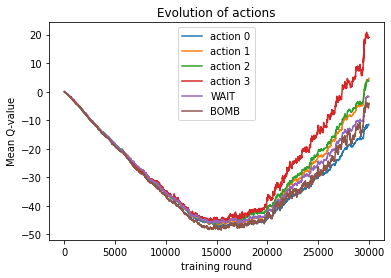

In [18]:
analyze_action()

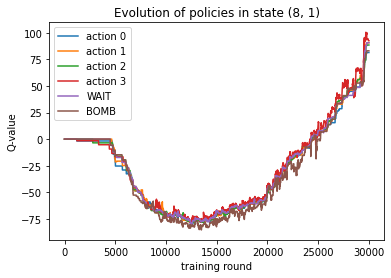

In [19]:
analyze_state((8, 1))

In [20]:
look_up_q_tensor(0)

Q-Tensor for case (f5 = 0):
state  direction features   policy  trained model                      number of encounters
 0  [0 0 0 0] [0]  4  [ -104.1 -104.1 -104.1 -104.1 -104.0 -104.1]  33636 [  2516  2544  2587  2586 21450  1953]
 1  [0 0 0 1] [0]  3  [ -104.1 -103.8 -103.4   82.3 -103.0 -103.6]  25729 [   575   637   583 22800   590   544]
 2  [0 0 1 1] [0]  3  [  -92.3  -90.2  -18.9  100.0  -88.5  -88.3]   3818 [   141   121   530  2814   123    89]
 3  [0 1 1 1] [0]  2  [  -47.3  -46.6   27.9  -47.2  -49.5  -50.5]    105 [     8    13    51    10    13    10]
 4  [1 1 1 1] [0]  0  [    0.0    0.0    0.0    0.0    0.0    0.0]      0 [     0     0     0     0     0     0]
 5  [0 0 0 2] [0]  3  [ -104.8 -104.8 -104.9   78.5 -103.9 -104.9]  71987 [  1386  1395  1420 65034  1425  1327]
 6  [0 0 1 2] [0]  3  [  -98.4  -99.9  -40.2   96.2  -99.7 -100.3]   7221 [   138   140   354  6278   155   156]
 7  [0 1 1 2] [0]  1  [  -81.1   62.8  -76.1  -57.5  -75.5  -80.8]    837 [    30   672  